In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

import pandas as pd
import numpy as np

In [82]:
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels

# Load dataset of "Retail Building"

In [30]:
retail_filename = "./Original/building1retail.csv"
retail_df =  pd.read_csv(retail_filename, header=0, index_col='Timestamp', parse_dates=True)
retail_df.head(10)

,OAT (F),Power (kW)
Timestamp,,
2010-01-01 01:15:00,51,165.1
2010-01-01 01:30:00,51,151.6
2010-01-01 01:45:00,51,146.9
2010-01-01 02:00:00,51,153.7
2010-01-01 02:15:00,51,153.8
2010-01-01 02:30:00,51,159.0
2010-01-01 02:45:00,51,157.7
2010-01-01 03:00:00,51,163.2
2010-01-01 03:15:00,50,151.7


In [6]:
#Describe data
retail_df.describe()

,OAT (F),Power (kW)
count,34940.000000,34940.000000
mean,58.585690,261.644659
std,8.739352,65.673392
min,33.000000,0.000000
25%,53.000000,194.600000
50%,58.000000,276.700000
75%,64.000000,312.300000
max,100.000000,457.900000


## Visualize (Retail building)

Text(0.5, 1.0, 'Power consumption of retail building')

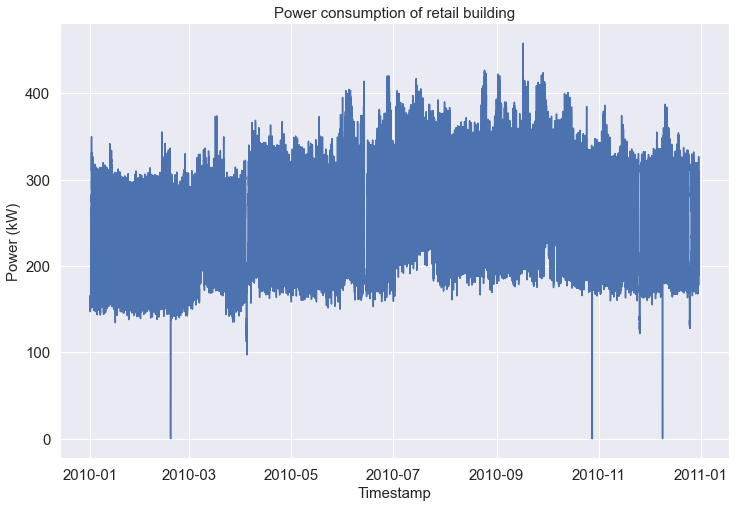

In [80]:
#Normal line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=retail_df, x=retail_df.index, y=retail_df['Power (kW)'])
plt.title('Power consumption of retail building')

<b> A closer look at the power consumption during holiday

<b> There are holiday in the United State which almost every people take a day off (Easter sunday, Christmas, etc.,)

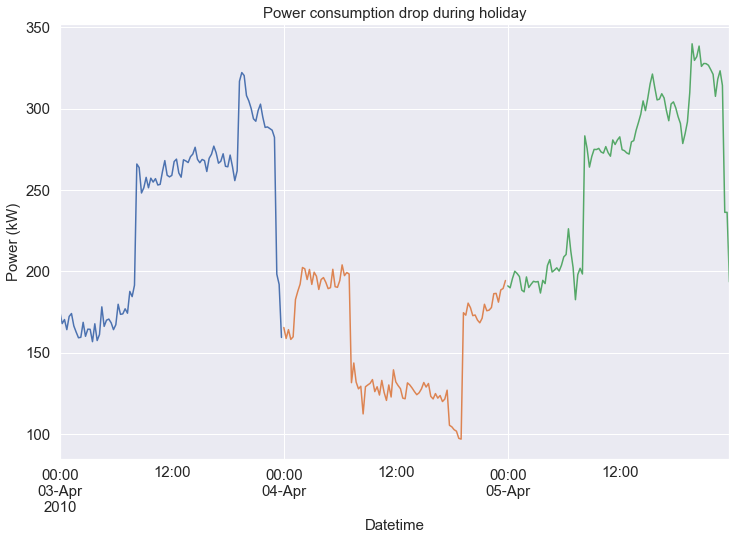

In [83]:
#The dataset is collecting in 2010, some holiday are have different date 
#Let's zoom in to power consumption during those holidays

#2010-04-04 is Easter Sunday (So, let's plot the two days between Easter Sunday)
easter_sun = ["2010-04-03", "2010-04-04", "2010-04-05"] #This is Easter Sunday
#christmas = ["2010-12-24", "2010-12-25", "2010-12-26"] #This is chirstmas day

plt.figure(figsize=(12, 8))
for i in easter_sun:
    retail_df.loc[i, 'Power (kW)'].plot()
plt.title("Power consumption drop during holiday")
plt.xlabel("Datetime")
plt.ylabel("Power (kW)")
plt.savefig("./Images/Consumtion-Holiday.png", dpi=400, format='png')

<b> - This graph shows that the "holiday" date can be a candidate feature for forcast a power consumption of retail building too.

In [8]:
#Copy the dataframe
new_retail_df = retail_df.copy()

In [9]:
#Group by day (sum total power consumption by day)
new_retail_df = new_retail_df.groupby(pd.Grouper(freq='D')).sum()
new_retail_df.head(7)

,OAT (F),Power (kW)
Timestamp,,
2010-01-01,4964,22433.4
2010-01-02,5032,23035.8
2010-01-03,4604,22309.1
2010-01-04,4632,22890.9
2010-01-05,4641,22831.4
2010-01-06,4711,22767.4
2010-01-07,4661,22733.8


In [10]:
#Add new column (days of week)
new_retail_df['daysofweek'] = new_retail_df.index.day_name()
new_retail_df.head(5)

,OAT (F),Power (kW),daysofweek
Timestamp,,,
2010-01-01,4964,22433.4,Friday
2010-01-02,5032,23035.8,Saturday
2010-01-03,4604,22309.1,Sunday
2010-01-04,4632,22890.9,Monday
2010-01-05,4641,22831.4,Tuesday


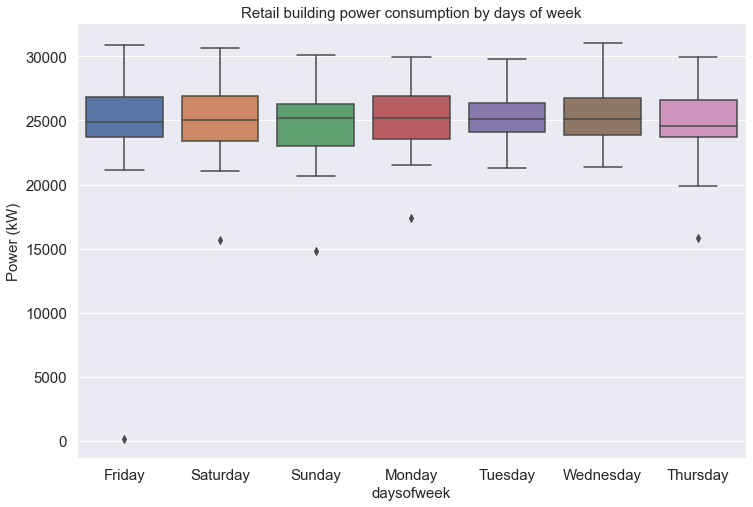

In [34]:
#Plot power consumption by days of week
plt.close()
plt.figure(figsize=(12, 8))
sns.boxplot(data=new_retail_df, x=new_retail_df.daysofweek, y=new_retail_df['Power (kW)'])
plt.title('Retail building power consumption by days of week')
plt.savefig("./Images/Retail_DaysofWeek.png", dpi=400, format='png')

<b> * The graph shows that retail building usually used almost the same amount of energy either weekday or weekend

# Load dataset of "Office Building"

In [55]:
office_filename = "./Original/building62postoffice.csv"
office_df =  pd.read_csv(office_filename, header=0, index_col='Date', parse_dates=True)
office_df.head(10)

,OAT,Power (kW)
Date,,
2011-01-01 00:00:00,17.035498,38.6
2011-01-01 01:00:00,15.704895,45.0
2011-01-01 02:00:00,14.573305,49.5
2011-01-01 03:00:00,13.716503,54.7
2011-01-01 04:00:00,13.720835,42.3
2011-01-01 05:00:00,13.860838,48.2
2011-01-01 06:00:00,15.111720,52.5
2011-01-01 07:00:00,13.931665,46.5
2011-01-01 08:00:00,14.413073,48.0


## Visualization (Office building)

Text(0.5, 1.0, 'Power consumption of office building')

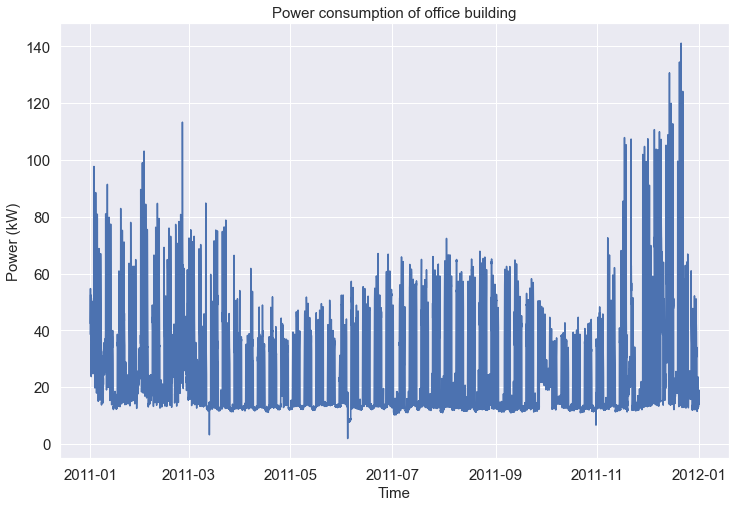

In [57]:
#Normal line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=office_df, x=office_df.index, y=office_df['Power (kW)'])
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Power consumption of office building')

<b> - There are no much information we can get from this line-plot graph, let's perform the same thing as retail building by plotting a box-plot

In [58]:
#Copy the dataframe
new_office_df = office_df.copy()

In [59]:
#Group by day (sum total power consumption by day)
new_office_df = new_office_df.groupby(pd.Grouper(freq='D')).sum()
new_office_df.head(7)

,OAT,Power (kW)
Date,,
2011-01-01,441.937770,961.6
2011-01-02,495.796795,914.5
2011-01-03,460.576920,1297.8
2011-01-04,508.626018,1227.3
2011-01-05,691.373795,1016.8
2011-01-06,735.516187,927.2
2011-01-07,855.737853,851.4


In [60]:
#Add new column (days of week)
new_office_df['daysofweek'] = new_office_df.index.day_name()
new_office_df.head(5)

,OAT,Power (kW),daysofweek
Date,,,
2011-01-01,441.937770,961.6,Saturday
2011-01-02,495.796795,914.5,Sunday
2011-01-03,460.576920,1297.8,Monday
2011-01-04,508.626018,1227.3,Tuesday
2011-01-05,691.373795,1016.8,Wednesday


### The below description
    
<b> 1) From the box-whisker plot, we noticed that the weekend power consumption was used less energy than weekday.

<b> 2) In short, this features such as (Days of week) and (Type of building) are important features for machine learning to predict the power consumption between "retail" or "office" buildings.

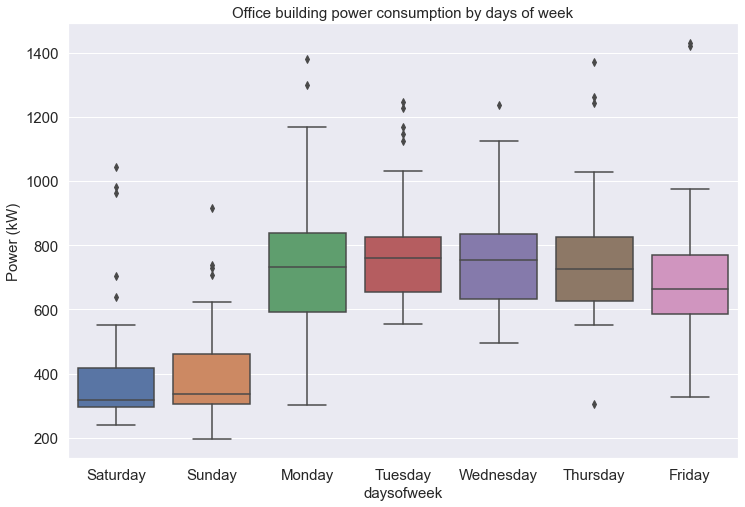

In [61]:
#Plot power consumption by days of week
plt.close()
plt.figure(figsize=(12, 8))
sns.boxplot(data=new_office_df, x=new_office_df.daysofweek, y=new_office_df['Power (kW)'])
plt.ylabel('Power (kW)')
plt.title('Office building power consumption by days of week')
plt.savefig("./Images/Office_DaysofWeek.png", dpi=400, format='png')